<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/CD/Atividades_Exercicios/Aula1_Atividades_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Atividades e Exercícios (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).



### Importar as bibliotecas

In [1]:
import numpy as np # Importar o numpy
import pandas as pd

## Atividade 1.1
#### Vamos tentar reproduzir este [gráfico](http://berkeleyearth.org/dv/temperature-change-vs-carbon-dioxide-concentration/) que mostra a correlação entre o aumento de emissão de CO2 e o aumento médio da temperatura global.
#### Não precisa ficar exatamente igual. Use o seu bom senso de quantos detalhes quer adicionar ao gráfico.



```
Dados de CO2: "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
Dados de temperatura: "https://datahub.io/core/global-temp/r/annual.csv"
```




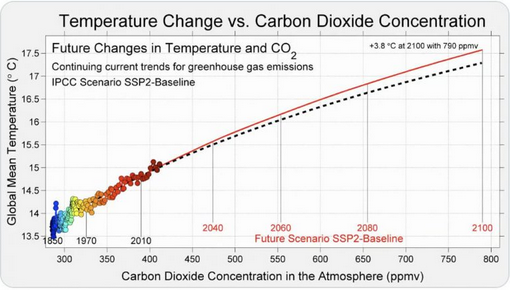

### Meu codigo a seguir para reproduzir a imagem acima

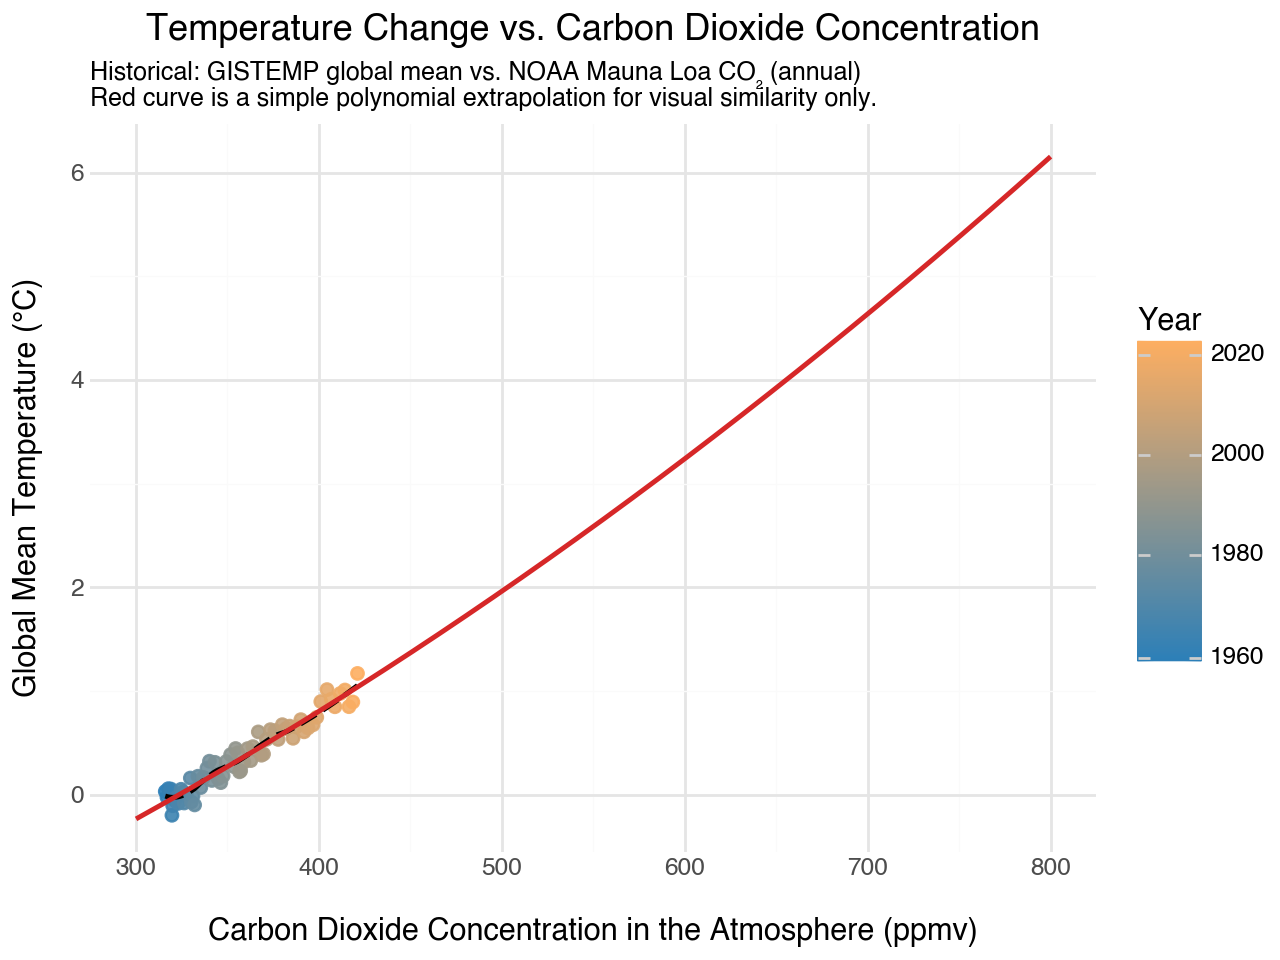

In [31]:
# !pip install scikit-misc
# !pip install plotnine pandas numpy requests

import io
import re
import numpy as np
import pandas as pd
import requests
from plotnine import (
    ggplot, aes, geom_point, geom_line, geom_smooth, labs, theme_minimal,
    scale_color_gradient, theme, element_text, scale_x_continuous
)

# -----------------------------
# 1) CO2 atmosférico (ppm) – NOAA Mauna Loa (média anual)
# Fonte: https://gml.noaa.gov/ccgg/trends/
# -----------------------------
co2_url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv"
co2_raw = requests.get(co2_url).text

# O CSV tem linhas de comentário começando com '#'
co2_df = pd.read_csv(io.StringIO(
    "\n".join([ln for ln in co2_raw.splitlines() if not ln.startswith("#")])
))
# Colunas típicas: year, mean, unc
co2_df = co2_df.rename(columns={"year": "year", "mean": "co2_ppm"})[["year", "co2_ppm"]]
co2_df["year"] = co2_df["year"].astype(int)

# -----------------------------
# 2) Temperatura média global anual – DataHub (GISTEMP)
# -----------------------------
temp_df = pd.read_csv("https://datahub.io/core/global-temp/r/annual.csv")
# Colunas: Source, Year, Mean (°C)
temp_df = temp_df[temp_df["Source"].str.contains("GISTEMP", na=False)]
temp_df = temp_df.rename(columns={"Year": "year", "Mean": "temp_c"})[["year", "temp_c"]]
temp_df["year"] = temp_df["year"].astype(int)

# -----------------------------
# 3) Merge e limpeza
# -----------------------------
df = pd.merge(co2_df, temp_df, on="year", how="inner").dropna()
# Mantém só período com ambas as séries (Mauna Loa começa em 1958)
df = df[(df["year"] >= 1958)]

# -----------------------------
# 4) (Opcional) Curva de “cenário” suave para dar o visual do exemplo
#    Aqui fazemos uma regressão polinomial simples temp ~ f(ppm)
#    e geramos valores de 300 a 800 ppm (APENAS visual, não é IPCC!)
# -----------------------------
ppm_grid = pd.DataFrame({"co2_ppm": np.linspace(300, 800, 300)})
# poly de 2º ou 3º grau costuma ficar suave; use 2 aqui
coef = np.polyfit(df["co2_ppm"], df["temp_c"], deg=2)
ppm_grid["temp_pred"] = np.polyval(coef, ppm_grid["co2_ppm"])

# -----------------------------
# 5) Gráfico
# -----------------------------
plot = (
    ggplot(df, aes(x="co2_ppm", y="temp_c", color="year"))
    + geom_point(size=2, alpha=0.9)
    # Ajuste LOESS histórico (tracejado preto)
    + geom_smooth(method="loess", se=False, color="black", linetype="dashed", span=0.5)
    # Projeção suave (linha vermelha) – meramente ilustrativa
    + geom_line(ppm_grid, aes(x="co2_ppm", y="temp_pred"), inherit_aes=False, size=1.0, color="#d62728")
    + labs(
        title="Temperature Change vs. Carbon Dioxide Concentration",
        subtitle="Historical: GISTEMP global mean vs. NOAA Mauna Loa CO₂ (annual)\n"
                 "Red curve is a simple polynomial extrapolation for visual similarity only.",
        x="Carbon Dioxide Concentration in the Atmosphere (ppmv)",
        y="Global Mean Temperature (°C)",
        color="Year"
    )
    + scale_x_continuous(limits=(300, 800))
    + scale_color_gradient(low="#2c7fb8", high="#fdae61")  # azul → laranja, lembrando o gradiente do exemplo
    + theme_minimal()
    + theme(
        plot_title=element_text(ha="center", size=13, weight="bold"),
        plot_subtitle=element_text(size=9),
        axis_title_x=element_text(margin={'t': 10}),
        axis_title_y=element_text(margin={'r': 10})
    )
)

display(plot)

# Se quiser salvar:
# plot.save("temp_vs_co2.png", width=8, height=4.5, dpi=300)

## Exercício 1.1
### Repita o gráfico Seasonal Changes presente nesse link http://berkeleyearth.lbl.gov/regions/global-land.

### Não precisa ficar igual, porém, quanto mais você se aproximar, maior será o seu domínio sobre a ferramenta de graficos. É uma oportunidade para você treinar sua capacidade de pesquisar uma solução para um problema específico.



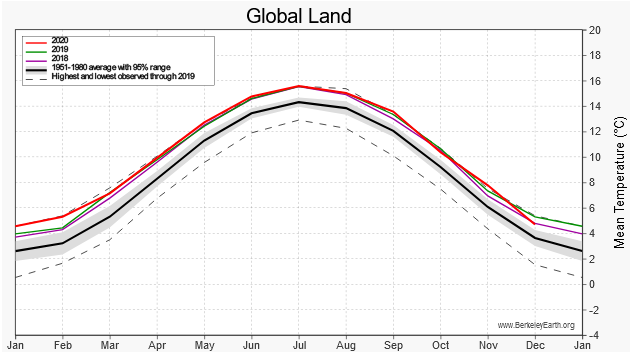



#### Plote as séries de 2016 a 2020 (ou 2022, à sua escolha) separadamente. E uma linha média com seu intervalo de confiança de 95% para os  anos de 1950 a 1980.
#### Você vai precisar dos dados de máximo e mínimo para o ano de 2019 (ou 2022, à sua escolha). Podem ser encontrados [aqui](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMAX_complete.txt) e [aqui](https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMIN_complete.txt).

/var/folders/rr/psyt99jd481f__7qw4g92h580000gn/T/ipykernel_40618/3144092504.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
/var/folders/rr/psyt99jd481f__7qw4g92h580000gn/T/ipykernel_40618/3144092504.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
/var/folders/rr/psyt99jd481f__7qw4g92h580000gn/T/ipykernel_40618/3144092504.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


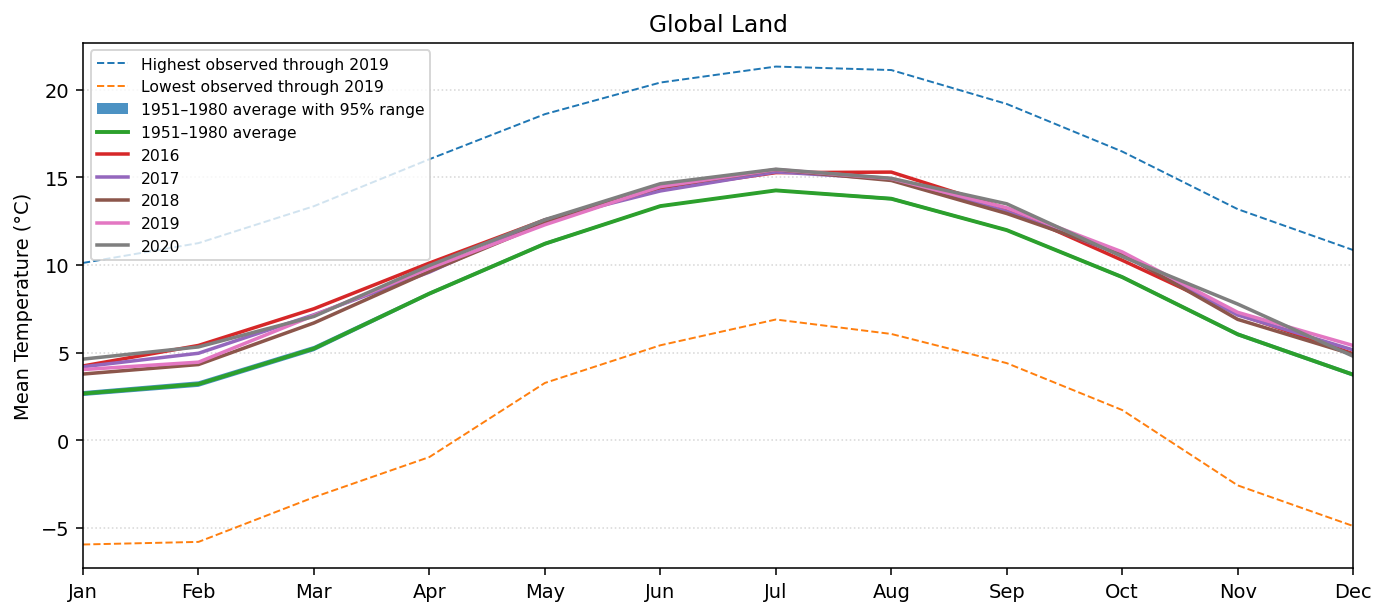

In [41]:
import re
import io
import requests
import numpy as np
import pandas as pd
from collections import OrderedDict

# robust baseline parsing + re-read & re-plot (replaces earlier parser)
import matplotlib.pyplot as plt

URL_TAVG = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TAVG_complete.txt"
URL_TMAX = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMAX_complete.txt"
URL_TMIN = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMIN_complete.txt"
MONTHS = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

def fetch_text(url):
    resp = requests.get(url)
    resp.raise_for_status()
    resp.encoding = "utf-8"
    return resp.text

def parse_monthly_baseline_from_text(text):
    """
    More robust: look for the first line (near top) containing >=12 numeric tokens
    and treat the first 12 as the monthly absolute baseline. This handles multiple
    Berkeley file header variants.
    """
    float_pat = re.compile(r"[-+]?(?:\d*\.\d+|\d+)")
    lines = text.splitlines()
    # search first ~400 lines for a line with >=12 numbers
    for ln in lines[:400]:
        nums = float_pat.findall(ln)
        if len(nums) >= 12:
            vals = [float(x) for x in nums[:12]]
            return {i+1: vals[i] for i in range(12)}
    # fallback: search entire text for any 12-number sequence
    for ln in lines:
        nums = float_pat.findall(ln)
        if len(nums) >= 12:
            vals = [float(x) for x in nums[:12]]
            return {i+1: vals[i] for i in range(12)}
    raise ValueError("Could not find monthly baseline values in the text header.")

def read_berkeley_monthly(url):
    text = fetch_text(url)
    baseline = parse_monthly_baseline_from_text(text)
    data_io = io.StringIO("\n".join([ln for ln in text.splitlines() if ln and not ln.startswith("%")]))
    df = pd.read_csv(
        data_io,
        delim_whitespace=True,
        header=None,
        usecols=[0,1,2,3],
        names=["year","month","anomaly","uncertainty"],
        engine="python",
        comment=None,
        skip_blank_lines=True
    )
    df["absolute"] = df.apply(lambda r: baseline[int(r["month"])] + r["anomaly"], axis=1)
    return df

# re-read datasets
tavg_df = read_berkeley_monthly(URL_TAVG)
tmax_df = read_berkeley_monthly(URL_TMAX)
tmin_df = read_berkeley_monthly(URL_TMIN)

# climatology 1951-1980 from TAVG
clim = tavg_df[(tavg_df["year"] >= 1951) & (tavg_df["year"] <= 1980)]
clim_stats = clim.groupby("month")["absolute"].agg(["mean","std","count"]).reset_index()
clim_stats["se"] = clim_stats["std"] / np.sqrt(clim_stats["count"])
clim_stats["lo"] = clim_stats["mean"] - 1.96*clim_stats["se"]
clim_stats["hi"] = clim_stats["mean"] + 1.96*clim_stats["se"]

EXTREMES_THRU_YEAR = 2019
highest = (
    tmax_df[tmax_df["year"] <= EXTREMES_THRU_YEAR]
    .groupby("month")["absolute"].max()
    .reindex(range(1,13))
)
lowest = (
    tmin_df[tmin_df["year"] <= EXTREMES_THRU_YEAR]
    .groupby("month")["absolute"].min()
    .reindex(range(1,13))
)

years = list(range(2016, 2021))
series_dict = {}
for yr in years:
    ser = (
        tavg_df[tavg_df["year"] == yr]
        .sort_values("month")
        .set_index("month")["absolute"]
        .reindex(range(1,13))
    )
    series_dict[yr] = ser

# plot (same layout as before)
plt.figure(figsize=(10,4.5), dpi=140)
plt.plot(range(1,13), highest.values, linestyle="--", linewidth=1, label=f"Highest observed through {EXTREMES_THRU_YEAR}")
plt.plot(range(1,13), lowest.values,  linestyle="--", linewidth=1, label=f"Lowest observed through {EXTREMES_THRU_YEAR}")
plt.fill_between(clim_stats["month"], clim_stats["lo"], clim_stats["hi"], alpha=0.8, label="1951–1980 average with 95% range")
plt.plot(clim_stats["month"], clim_stats["mean"], linewidth=2, label="1951–1980 average")
for yr in years:
    plt.plot(range(1,13), series_dict[yr].values, linewidth=1.8, label=str(yr))
plt.title("Global Land")
plt.xlim(1,12)
plt.xticks(range(1,13), MONTHS)
plt.ylabel("Mean Temperature (°C)")
plt.grid(True, axis="y", linestyle=":", alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
unique = OrderedDict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()